<a href="https://colab.research.google.com/github/pushyag1/NLPClass/blob/master/Movie_Reviews_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data 
2. Take a look at the data and get info about the data 
3. Count the number of expressed sentiments by category 
4. Provide a histogram of sentiments by category 
5. Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize and remove symbols and numbers 
6. Split dataset (the test dataset represents 30% of the total data). 
7. Import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function. Compute the model accuracy. 
8. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So, the words must be a signature word. Use TfidfVectorizer() for 'Phrase'. 
9. Split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly. 
10. Build the Text Classification Model using TF-IDF. 
11. First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function. 
12. Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [1]:
import numpy as np
import pandas as pd
data = data=pd.read_csv('train.tsv', sep='\t')

In [3]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
data.info

<bound method DataFrame.info of         PhraseId  ...  Sentiment
0              1  ...          1
1              2  ...          2
2              3  ...          2
3              4  ...          2
4              5  ...          2
...          ...  ...        ...
156055    156056  ...          2
156056    156057  ...          1
156057    156058  ...          3
156058    156059  ...          2
156059    156060  ...          2

[156060 rows x 4 columns]>

In [4]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

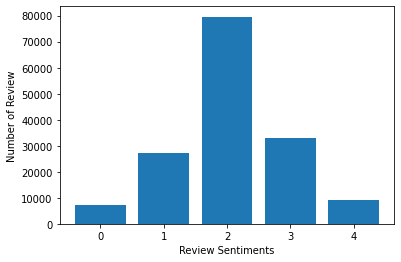

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [ ]:
print(text_counts)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [9]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684
